# Customer Transaction Prediction 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('train(1).csv')   # Loading the dataset
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


# Business Statement

# Basic checks

In [3]:
df.head()            # First 5 rows of the dataset

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df.tail()               # Last 5 rows of the dataset

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [5]:
df.describe()               # Statistical information about the dataset

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
df.info()               # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
# 'ID_code' column indicates id numbers and it independent of target column 
df1 = df.drop('ID_code', axis = 1)

In [8]:
df1

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [9]:
# Spliting the data into X and Y
X = df1.drop('target', axis = 1)
Y = df1['target']

In [10]:
X.shape  # Shape of the dataset

(200000, 200)

In [11]:
Y.shape,Y.value_counts()

((200000,),
 0    179902
 1     20098
 Name: target, dtype: int64)

In [12]:
# We can notice that their is a more dimensions, Data is imbalaced & Target feature  is imbalanced 


# EDA

EDA cannot be done for this dataset because there are no feature names are provided in the given dataset.

# Outliers

 We cannot find outliers as EDA is not done for this dataset.

# Principal Component Analysis (PCA)


In [13]:
### As features are more and column names are unknown as process of diemensinality reduction we choosen  PCA
pca = PCA(n_components = 0.95, svd_solver = 'full')
X_pca = pca.fit_transform(X)
X_pca

array([[ -5.60646899, -23.55440926,  -1.899704  , ...,   5.41563294,
          1.98110756,   5.4449445 ],
       [ 34.87802792,  11.46929107,  -3.75977398, ...,  -2.92756827,
         -0.47994981,  -2.75461323],
       [ -4.79023946,  -0.33421344,  11.35931802, ...,   1.1990427 ,
         -2.04303563,   4.956015  ],
       ...,
       [ 36.84227048,   7.76008289,  30.23221393, ...,   1.26350447,
          4.61521089,   0.41376635],
       [ 30.23091675, -24.4235161 ,  25.55355302, ...,   5.882554  ,
         -0.32885376,   2.80609371],
       [ -5.99488377,   7.69716402,  10.11166579, ...,  -4.22976642,
         -1.09201667,   1.02511155]])

In [14]:
X_pca.shape

(200000, 111)

# Scaling


In [15]:
# Standardization of Data by MinMaxScaler due imbalanced data
scaler = MinMaxScaler()
scaler.fit(X_pca)

MinMaxScaler()

In [16]:
X_pca

array([[ -5.60646899, -23.55440926,  -1.899704  , ...,   5.41563294,
          1.98110756,   5.4449445 ],
       [ 34.87802792,  11.46929107,  -3.75977398, ...,  -2.92756827,
         -0.47994981,  -2.75461323],
       [ -4.79023946,  -0.33421344,  11.35931802, ...,   1.1990427 ,
         -2.04303563,   4.956015  ],
       ...,
       [ 36.84227048,   7.76008289,  30.23221393, ...,   1.26350447,
          4.61521089,   0.41376635],
       [ 30.23091675, -24.4235161 ,  25.55355302, ...,   5.882554  ,
         -0.32885376,   2.80609371],
       [ -5.99488377,   7.69716402,  10.11166579, ...,  -4.22976642,
         -1.09201667,   1.02511155]])

In [17]:
X_pca.shape

(200000, 111)

In [18]:
X_pca1 = scaler.transform(X_pca)
X_pca1

array([[0.45343851, 0.25950483, 0.46096636, ..., 0.69513416, 0.58801738,
        0.74316446],
       [0.71872261, 0.59361521, 0.4426078 , ..., 0.37696545, 0.47557262,
        0.35750013],
       [0.45878705, 0.48101508, 0.59183054, ..., 0.53433412, 0.40415583,
        0.72016778],
       ...,
       [0.73159376, 0.55823103, 0.77810267, ..., 0.53679238, 0.70836854,
        0.50652415],
       [0.68827133, 0.25121394, 0.73192512, ..., 0.71294023, 0.48247614,
        0.61904672],
       [0.45089333, 0.55763081, 0.57951644, ..., 0.32730601, 0.44760752,
        0.53527863]])

# SMOTE

In [19]:
# Balancing the imbalanced target feature
smote=SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_pca1,Y)

In [20]:
Y_resampled.value_counts()

0    179902
1    179902
Name: target, dtype: int64

In [21]:
X_resampled.shape

(359804, 111)

# Models creation and Models evaluation 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Creating a Logistic Regression classifier
clf = LogisticRegression()

# Training the classifier on the training set
clf.fit(X_train, Y_train)

# Predicting the labels for train & test data
Y_pred = clf.predict(X_test)
Y1_pred = clf.predict(X_train)

# Evaluating the accuracy of the train data & test data
train_accuracy = accuracy_score(Y_train, Y1_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)


Train_Accuracy: 0.7263779371242982
Test_Accuracy: 0.7240184543551167


In [27]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(Y_train,Y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.728001,0.722297,0.725111,0.725149,0.725148
recall,0.718587,0.731633,0.725111,0.725110,0.725111
f1-score,0.723263,0.726935,0.725111,0.725099,0.725100
support,125904.000000,125958.000000,0.725111,251862.000000,251862.000000


In [28]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))


,0,1,accuracy,macro avg,weighted avg
precision,0.726066,0.720297,0.723148,0.723182,0.723183
recall,0.717138,0.729164,0.723148,0.723151,0.723148
f1-score,0.721574,0.724703,0.723148,0.723139,0.723138
support,53998.000000,53944.000000,0.723148,107942.000000,107942.000000


# 2. Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Creating a DecisionTreeClassifier object
clf = DecisionTreeClassifier(max_depth=40)

# Training the model to the training data
clf.fit(X_train, Y_train)

# Predicting the labels for train & testdata
Y_pred = clf.predict(X_test)
Y1_pred = clf.predict(X_train)

# Evaluating the accuracy of the train data & test data
train_accuracy = accuracy_score(Y_train, Y1_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)


Train_Accuracy: 0.9865481890876749
Test_Accuracy: 0.760010005373256


In [31]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(Y_train,Y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.999275,0.974460,0.986548,0.986867,0.986864
recall,0.973797,0.999293,0.986548,0.986545,0.986548
f1-score,0.986372,0.986720,0.986548,0.986546,0.986546
support,125904.000000,125958.000000,0.986548,251862.000000,251862.000000


In [32]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.793412,0.733390,0.76001,0.763401,0.763416
recall,0.703415,0.816662,0.76001,0.760038,0.760010
f1-score,0.745708,0.772789,0.76001,0.759248,0.759242
support,53998.000000,53944.000000,0.76001,107942.000000,107942.000000


# 3. Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Creating a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Training the classifier on the training set
clf.fit(X_train, Y_train)

# Predicting the labels for the train & test data
Y_pred = clf.predict(X_test)
Y1_pred = clf.predict(X_train)


# Evaluating the accuracy of the train data & test data
train_accuracy = accuracy_score(Y_train, Y1_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)


Train_Accuracy: 1.0
Test_Accuracy: 0.9460080413555428


In [25]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(Y_train,Y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,125904.0,125958.0,1.0,251862.0,251862.0


In [26]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.927752,0.965915,0.946008,0.946834,0.946824
recall,0.967406,0.924588,0.946008,0.945997,0.946008
f1-score,0.947164,0.944800,0.946008,0.945982,0.945983
support,53998.000000,53944.000000,0.946008,107942.000000,107942.000000


# 4. Support Vector Classifier 

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Creating an SVM classifier
clf = SVC(kernel='linear')

# Training the classifier on the training set
clf.fit(X_train, Y_train)


# Predicting the labels for train & test data
Y_pred = clf.predict(X_test)
Y1_pred = clf.predict(X_train)


# Evaluating the accuracy for the train data & test data
train_accuracy = accuracy_score(Y_train, Y1_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)



Train_Accuracy: 0.725695023465231
Test_Accuracy: 0.724213003279539


In [37]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(Y_train,Y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.733509,0.718394,0.725695,0.725951,0.725950
recall,0.708778,0.742605,0.725695,0.725691,0.725695
f1-score,0.720932,0.730299,0.725695,0.725615,0.725616
support,125904.000000,125958.000000,0.725695,251862.000000,251862.000000


In [38]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.732208,0.716735,0.724213,0.724471,0.724475
recall,0.707434,0.741009,0.724213,0.724221,0.724213
f1-score,0.719607,0.728670,0.724213,0.724139,0.724136
support,53998.000000,53944.000000,0.724213,107942.000000,107942.000000


# 5. KNN classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Creating a KNeighborsClassifier object with k=5
clf = KNeighborsClassifier(n_neighbors=35)


# Training the model to the training data
clf.fit(X_train, Y_train)

# Predicting the labels of the train & test data
Y_pred = clf.predict(X_test)
Y1_pred = clf.predict(X_train)

# Calculating the accuracy of the train data & test data
train_accuracy = accuracy_score(Y_train, Y1_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy: 0.4997498656685998
Train_Accuracy: 0.5001072015627606
Test_Accuracy: 0.4997498656685998


In [40]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(Y_train,Y1_pred,output_dict=True))


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.0,0.500107,0.500107,0.250054,0.250107
recall,0.0,1.000000,0.500107,0.500000,0.500107
f1-score,0.0,0.666762,0.500107,0.333381,0.333452
support,125904.0,125958.000000,0.500107,251862.000000,251862.000000


In [41]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.0,0.499750,0.49975,0.249875,0.249750
recall,0.0,1.000000,0.49975,0.500000,0.499750
f1-score,0.0,0.666444,0.49975,0.333222,0.333055
support,53998.0,53944.000000,0.49975,107942.000000,107942.000000


# 6. Naive Bayes 

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Creating a Naive Bayes classifier
clf = GaussianNB()

# Training the classifier on the training set
clf.fit(X_train, Y_train)

# Predicting the labels of the train & test data
Y_pred = clf.predict(X_test)
Y1_pred = clf.predict(X_train)

# Evaluating the accuracy of the tarin data & test data
train_accuracy = accuracy_score(Y_train, Y1_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)


Train_Accuracy: 0.8338177255798811
Test_Accuracy: 0.8355135165181301


In [43]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(Y_train,Y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.806388,0.866618,0.833818,0.836503,0.836510
recall,0.878487,0.789168,0.833818,0.833827,0.833818
f1-score,0.840895,0.826082,0.833818,0.833488,0.833487
support,125904.000000,125958.000000,0.833818,251862.000000,251862.000000


In [44]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))


,0,1,accuracy,macro avg,weighted avg
precision,0.808593,0.867632,0.835514,0.838113,0.838098
recall,0.879347,0.791636,0.835514,0.835492,0.835514
f1-score,0.842487,0.827894,0.835514,0.835190,0.835194
support,53998.000000,53944.000000,0.835514,107942.000000,107942.000000


# 7. Neural Network 

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Creating a Neural Network classifier
clf = MLPClassifier(hidden_layer_sizes=(100,))

# Training the classifier on the training set
clf.fit(X_train, Y_train)

# Predicting the labels of the train & test data
Y_pred = clf.predict(X_test)
Y1_pred = clf.predict(X_train)


# Evaluating the accuracy of the train data & test data
train_accuracy = accuracy_score(Y_train, Y1_pred)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 0.8413456575426226
Test_Accuracy: 0.8228771006651721


In [25]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(Y_train,Y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.867478,0.818697,0.841346,0.843087,0.843082
recall,0.805709,0.876967,0.841346,0.841338,0.841346
f1-score,0.835453,0.846831,0.841346,0.841142,0.841143
support,125904.000000,125958.000000,0.841346,251862.000000,251862.000000


In [26]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.849875,0.799714,0.822877,0.824794,0.824807
recall,0.784511,0.861282,0.822877,0.822896,0.822877
f1-score,0.815886,0.829357,0.822877,0.822621,0.822618
support,53998.000000,53944.000000,0.822877,107942.000000,107942.000000


# Hyperparameter Tuning

Hyperparameter tuning cannot be done for this dataset as it is not able to fit all the rows and columns since it has huge amount of data.

# Comparison Report of the Models

In [50]:
from prettytable import PrettyTable
x=PrettyTable()

In [51]:
x.field_names = ["Model","(test)Accuracy", "(train)Accuracy"]
x.add_row(["Logistic Regression",'72.3 %','72.5%'])
x.add_row(["Decision Trees Classifier",' 76 %','98 %'])
x.add_row(["Random Forest Classifier", '94 %','100 %'])
x.add_row(["Support Vector Classifier",'72.4 %','72.5 %'])
x.add_row(["K-Nearest Neighbor Classifier", '49 %','50%'])
x.add_row(["Naive Bayes classifier",'83.5 %','83.3 %'])
x.add_row(["Neural Network classifier",'82.2%','84.1 %'])


In [52]:
print(x)

+-------------------------------+----------------+-----------------+
|             Model             | (test)Accuracy | (train)Accuracy |
+-------------------------------+----------------+-----------------+
|      Logistic Regression      |     72.3 %     |      72.5%      |
|   Decision Trees Classifier   |      76 %      |       98 %      |
|    Random Forest Classifier   |      94 %      |      100 %      |
|   Support Vector Classifier   |     72.4 %     |      72.5 %     |
| K-Nearest Neighbor Classifier |      49 %      |       50%       |
|     Naive Bayes classifier    |     83.5 %     |      83.3 %     |
|   Neural Network classifier   |     82.2%      |      84.1 %     |
+-------------------------------+----------------+-----------------+


#  From above we came to conclude that Random Forest Classifier is the best model for this dataset 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Creating the model
rfc = RandomForestClassifier()

# Creating the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Performing Grid Search with 5-fold cross validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fiting the grid search to the data
grid_search.fit(X_train, Y_train)

# Printing the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluating the model on the test data
Y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy on test data: ", accuracy)


# MODEL EVALUATING ON RANDOM FOREST CLASSIFIER

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

#clf = RandomForestClassifier(n_estimators=100)
#clf.fit(X_train, Y_train)


# Making predictions on the test set
#Y_pred = clf.predict(X_test)

# Calculating precision, recall, and F1 score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Calculating confusion matrix
#cm = confusion_matrix(Y_test, Y_pred)

# Printing  results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#print("Confusion Matrix:\n", cm)


Precision: 0.9659152529243163
Recall: 0.9245884621088536
F1 Score: 0.9448001515438531


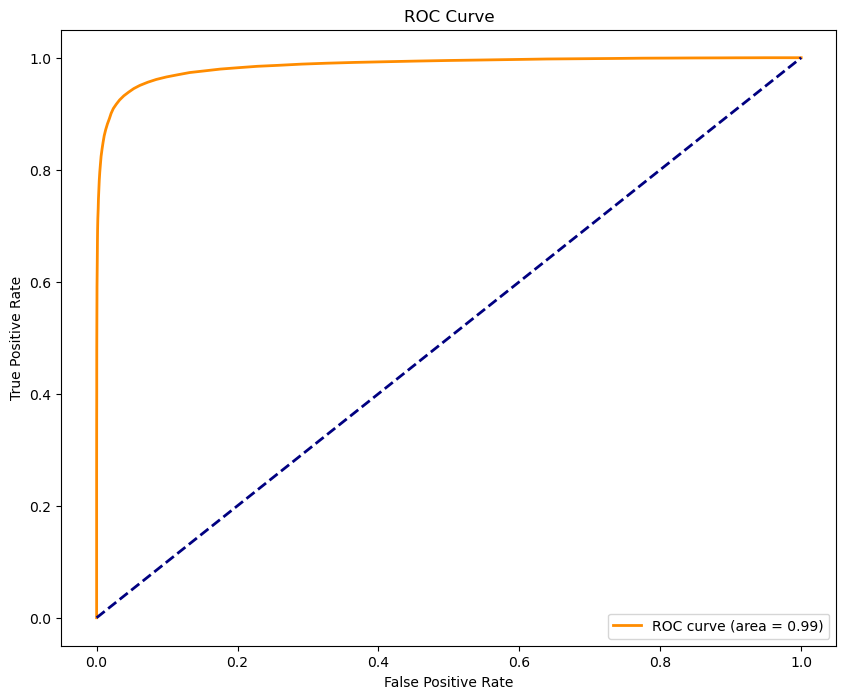

AUC Score: 0.9859195935335915


In [28]:
from sklearn.metrics import roc_curve, auc


# Predicting probabilities on test data
Y_prob = clf.predict_proba(X_test)[:, 1]

# Computing ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Ploting ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Printing AUC score
print("AUC Score:", roc_auc)


# Conclusion Report
- Based on the given values, the performance of several classification algorithms is analyzed. The models are evaluated on training accuracy and testing accuracy.

- Logistic Regression: The training and testing accuracy of logistic regression is 72.5% and 72.3% respectively. The model seems to be performing decently well.

- Decision Tree Classifier: The training accuracy of the decision tree classifier is very high (98%), but the testing accuracy is 76%. This indicates that the model may be overfitting on the training data.

- Random Forest Classifier: The random forest classifier has a training accuracy of 100% and a testing accuracy of 94%. This suggests that the model is likely to perform well on new data.

- Support Vector Classifier: The training and testing accuracy of support vector classifier is 72.5% and 72.4% respectively. The model seems to be performing decently well.

- KNN Classifier: The KNN classifier has a training accuracy of 50% and a testing accuracy of 49%. This indicates that the model is not performing well and may require further optimization.

- Naive Bayes Classifier: The Naive Bayes classifier has a training accuracy of 83.3% and a testing accuracy of 83.5%. This indicates that the model is performing well and is able to generalize to new data.

- Neural Network Classifier: The neural network classifier has a training accuracy of 84.1% and a testing accuracy of 82.2%. Although the training accuracy is slightly better than the testing accuracy, the model seems to be performing well.

- In conclusion, the random forest classifier, Naive Bayes classifier, and neural network classifier seem to be the best performing models, as they have high testing accuracies and are likely to generalize well to new data. The decision tree classifier, KNN classifier, logistic regression, and support vector classifier may require further optimization to improve their performance.